In [114]:
import numpy as np
import pandas as pd
import seaborn as sns

In [115]:
df = pd.read_csv('/Users/xp/Downloads/crypto-markets.csv')

In [116]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [117]:
btc_data = df.loc[df['symbol'] == 'BTC']

In [118]:
btc_data

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95
2040,bitcoin,BTC,Bitcoin,2018-11-28,1,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,0.7720,563.43


In [119]:
sorted_btc_data = btc_data.sort_values('date', ascending= False)
sorted_btc_data

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
2041,bitcoin,BTC,Bitcoin,2018-11-29,1,4269.00,4413.02,4145.77,4278.85,6.503348e+09,7.445102e+10,0.4980,267.25
2040,bitcoin,BTC,Bitcoin,2018-11-28,1,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,0.7720,563.43
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49


In [120]:
sorted_btc_data['T-1'] = sorted_btc_data['close'].shift(-1)
sorted_btc_data['T-2'] = sorted_btc_data['close'].shift(-2)
sorted_btc_data['T-3'] = sorted_btc_data['close'].shift(-3)
sorted_btc_data['mean_price_3_days'] = sorted_btc_data['close'].rolling(window=3, min_periods=1).mean()

In [121]:
sorted_btc_data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,T-1,T-2,T-3,mean_price_3_days
2041,bitcoin,BTC,Bitcoin,2018-11-29,1,4269.00,4413.02,4145.77,4278.85,6.503348e+09,7.445102e+10,0.4980,267.25,4257.42,3820.72,3779.13,4278.850000
2040,bitcoin,BTC,Bitcoin,2018-11-28,1,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,0.7720,563.43,3820.72,3779.13,4009.97,4268.135000
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95,3779.13,4009.97,3880.76,4118.996667
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22,4009.97,3880.76,4347.11,3952.423333
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81,3880.76,4347.11,4365.94,3869.940000


In [122]:
X = sorted_btc_data[['T-1', 'T-2','T-3']].fillna(0)
y = sorted_btc_data['close']

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
lm = LinearRegression()


In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=42)

In [127]:
lm.fit(X_train, y_train)

LinearRegression()

In [128]:
predicted = lm.predict(X_test)

In [129]:
lm.coef_

array([ 1.12223588, -0.19266162,  0.06355341])

In [130]:
from sklearn.metrics import root_mean_squared_error

In [131]:
sqrt_error = root_mean_squared_error(y_test, predicted)

In [133]:
sqrt_error

245.06888534278357

In [134]:
error = y_test - predicted

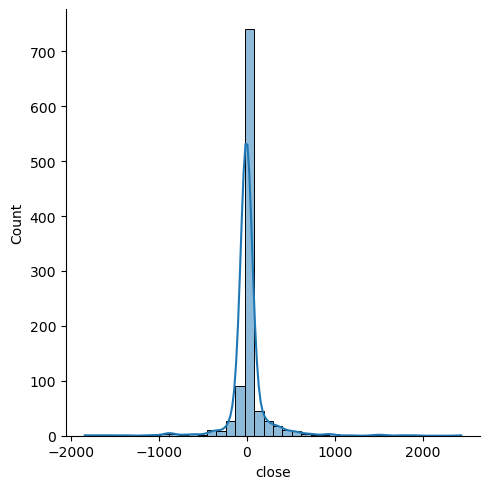

In [139]:
sns.displot(error, kde = True, bins= 40)